# Week10 

This weeek's tutorial provides an introduction into **Ensemble Methods**.

*You may want to start with the last part of the challenges to get you up to speed with some implementations of various ensemble methods :)*

In [2]:
## to view 3D scatterplots in a new window (and be able to rotate the plot),
## restart this notebook, comment the next line, uncomment the following one and then run this cell
%pylab inline
#from pylab import *

Populating the interactive namespace from numpy and matplotlib


In [3]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets

def generate_dataset(nsamples=100, nfor=5, type_is='both', plot='False'):
    """
    Function to generate two types fo datasets, moons and spiral 
    by generating two curves and them generating random noisy points around them
    
    Inputs:
    nsamples: number of samples for a single curve
    nfor:     numbers of curves
    type_is:  'both','moon', 'spiral' - specify the type of dataset to be generated
    plot:     bool - if plot then see the generated dataset(s)
    
    Outputs:
    if type_is is 'both'
        return X_moon, target_moon, X_spiral, target_spiral
    else
        return X_<type>, target_<type>, <type> = 'moon' or 'spiral'
    """
    
    f, axarr = plt.subplots(2, 2)
    n_samples = nsamples*nfor
    colors = np.array([x for x in 'bgrcmykbgrcmykbgrcmykbgrcmyk'])
    colors = np.hstack([colors] *nsamples*nfor)

    noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05)
    X,y = noisy_moons
    axarr[0,0].scatter(X[:,0],X[:,1],color=colors[y].tolist(),edgecolors='black')
    #plt.scatter(X[:,0],X[:,1],color='blue')

    #axarr[1,0].scatter(X[:,0][y == 1.],X[:,1][y == 1.],color='blue')
    #axarr[1,0].scatter(X[:,0][y != 1.],X[:,1][y != 1.],color='red')



    nverts = nsamples
    nfor=nfor
    npts = 2 * nfor * nverts 
    dataset = np.zeros([npts,3])
    print dataset.shape
    for i in range(0,nfor):
        # Make some spirals
        r = np.arange(nverts) + i*np.random.randn(nverts) + 5
        theta = np.linspace(0, 4*np.pi, nverts) + .5*np.random.randn(nverts)
        xx = r * np.sin(theta)
        yy = r * np.cos(theta)
        axarr[0,1].scatter(xx,yy)
        from_ = i*nverts
        to_ = (i+1)*nverts 
        #print from_,to_
        dataset[from_:to_,0] = xx
        dataset[from_:to_,1] = yy
        dataset[from_:to_,2] = np.ones(nverts)
        # Make some spirals
        r = np.arange(nverts) + 2*i*np.random.randn(nverts)
        theta = np.linspace(3, 5*np.pi, nverts) + .5*np.random.randn(nverts)
        xx = r * np.sin(theta)
        yy = r * np.cos(theta)
        from_ = nverts*nfor+i*nverts 
        to_ = nverts*nfor+(i+1)*nverts 
        #print from_,to_
        
        dataset[from_:to_,0] = xx
        dataset[from_:to_,1] = yy
        dataset[from_:to_,2] = -1*np.ones(nverts)
        axarr[0,1].scatter(xx,yy,color='red',edgecolors='black') 
        
    #axarr[1,1].scatter(dataset[:,0][dataset[:,2] == 1],dataset[:,1][dataset[:,2] == 1],color='blue')
    #axarr[1,1].scatter(dataset[:,0][dataset[:,2] == -1],dataset[:,1][dataset[:,2] == -1],color='red')
    if plot:
        plt.show()
    if type_is == 'both':
        return X, y, dataset[:,0:2], dataset[:,2]
    if type_is == 'moon':
        return X, y
    if type_is == 'spiral':
        return dataset[:,0:2], dataset[:,2]


def plot_decision_surfaces(X,y,model,alpha=1,plot_step = 0.02):
    """
    Generate decision surfaces for a data set, its labels and the model trained on that data set
    
    Inputs:
    X:         data set, in our case it has only two features/dimensions :)
    y:         labels for the train data
    model:     model used to train on the data set, must have a 'predict' method that outputs labels for test data
    alpha:     controls surface transparency 
    plot_step: how coarse/fine the mesh should be (finer mesh -> smoother surfaces)
    """
    cmap = plt.cm.RdYlBu
    colors = np.array([x for x in 'rbcmykg'])
    # Now plot the decision boundary using a fine mesh as input to a
    # filled contour plot
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                             np.arange(y_min, y_max, plot_step))

    # Plot either a single DecisionTreeClassifier or alpha blend the
    # decision surfaces of the ensemble of classifiers
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    labels = np.unique(y)
    for i in range(len(labels)):
        plt.scatter(X[:,0][y==labels[i]],X[:,1][y==labels[i]],color=colors[i].tolist(),edgecolors='black')
    cs = plt.contourf(xx, yy, Z, alpha=alpha, cmap=cmap)
    plt.show()
    


(10000, 3)


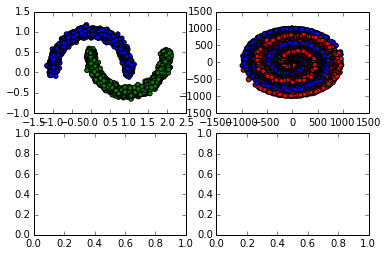

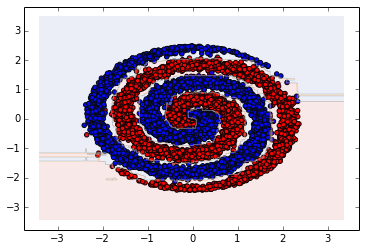

In [4]:
#Example
from sklearn.ensemble import RandomForestClassifier
ESTIMATORS = 50
RANDOM_SEED = 13  # fix the seed on each iteration
X,y = generate_dataset(nsamples=1000,type_is='spiral')
model = RandomForestClassifier(n_estimators=ESTIMATORS)

# Shuffle
idx = np.arange(X.shape[0])
np.random.seed(RANDOM_SEED)
np.random.shuffle(idx)
X = X[idx]
y = y[idx]

# Standardize
mean = X.mean(axis=0)
std = X.std(axis=0)
X = (X - mean) / std

# Train
clf = model
clf = model.fit(X, y)

plot_decision_surfaces(X,y,clf,alpha=.1)




## What you should know before solving the challenges:
 - Boosting
 - Bagging
 - Stacking
 - Random Forests and CART
 - Committee methods. Ensemble
 

# Challenges

### 1. CART. Random forests


- *Building up insight*. Consider the spiral dataset given below. It has 1000 data points. Without writing a CART implementation, answer the following questions:
 - What is a suitable max depth to set for this tree?
 - What is the minimum number of nodes such that the nodes are all "pure"?
 - Are you overfitting if all your nodes are pure?
 
- Now build an implementationd of CART and test your insight.
 - *challenging*: you may use Algorithm 16.1 from ML- A Probabilistic Approach (Murphy)
 - *fast and simple*: you may use the out-of-the-box implementation for Decision Trees from scikit-learn
 
- Generate a bigger dataset(let's say 5000 points). Split it 70/30. Use a random forest to predict the data. How many trees/estimators does it need to get an accuracy of 90%?
 
    

(1000, 3)


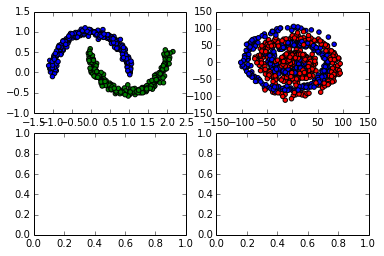

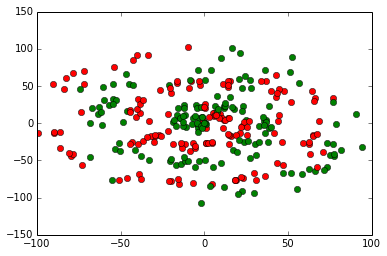

Accuracy: 0.81


In [4]:
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')

X,y = generate_dataset(type_is='spiral',plot=True)
data_set = np.column_stack((X,y))
np.random.shuffle(data_set)
training_size = 0.7*len(data_set)
training_set = data_set[0:training_size]
test_set = data_set[training_size:]
model = tree.DecisionTreeClassifier(max_depth=10)
model.fit(training_set[:,0:2],training_set[:,2:3])
ok = 0.0
for point in test_set:
    pred = model.predict([point[0],point[1]])
    if pred[0] == point[2]:
        ok+=1
    if(pred[0]==1):
        plt.plot(point[0],point[1],"ro")
    else:
        plt.plot(point[0],point[1],"go")
plt.show()
print "Accuracy: "+str(ok/len(test_set))
        

(50000, 3)


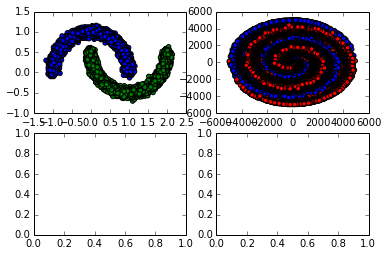

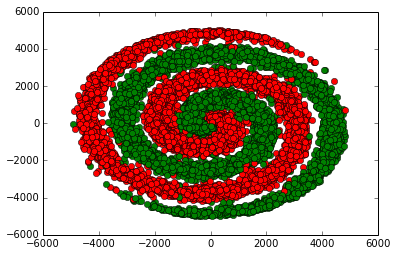

Accuracy: 0.9858


In [81]:
X,y = generate_dataset(nsamples=5000,type_is='spiral',plot=True)
data_set = np.column_stack((X,y))
np.random.shuffle(data_set)
training_size = 0.7*len(data_set)
training_set = data_set[0:training_size]
test_set = data_set[training_size:]
model = RandomForestClassifier(n_estimators=1)
model.fit(training_set[:,0:2],training_set[:,2:3])
ok = 0.0
for point in test_set:
    pred = model.predict([point[0],point[1]])
    if pred[0] == point[2]:
        ok+=1
    if(pred[0]==1):
        plt.plot(point[0],point[1],"ro")
    else:
        plt.plot(point[0],point[1],"go")
plt.show()
print "Accuracy: "+str(ok/len(test_set))
        

### 2. Bagging

- Perform bagging with linear classifiers (you can reuse code from week5). Take the dataset from the previous exercise and generate 10, 15 and 20 bootstrap batches of the training data. Train a linear classifier using each set of bootstrap and report performances for the classification task.

(10000, 3)


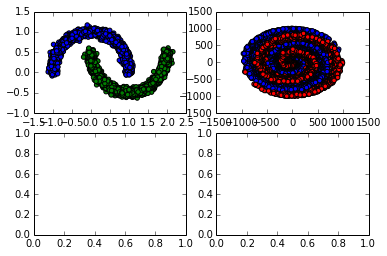

Bagging with 10 batches accuracy: 0.517


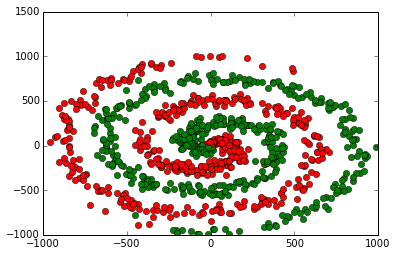

Bagging with 15 batches accuracy: 0.551


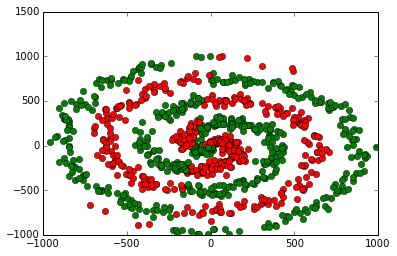

Bagging with 20 batches accuracy: 0.528


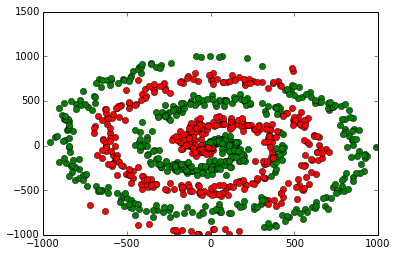

In [6]:
class LinearClassifier:
    
    def train(self,train_set):
        self.X = train_set[:,0:2]
        self.X = np.column_stack((self.X, np.full(self.X.shape[0],1.0)))
        self.T = train_set[:,2:3]
        self.W = np.linalg.inv(self.X.T.dot(self.X)).dot(self.X.T).dot(self.T)
        self.W=self.W.T[0]
        boundary_x = np.arange(-1000,1000,1)
        boundary_y = [(x*(-self.W[0]/self.W[1])-self.W[2]/self.W[1]) for x in boundary_x]

        #plt.plot(boundary_x,boundary_y,"g-")
        
    def classify(self,X):
        return np.sign(self.W[0]*X[0]+self.W[1]*X[1]+self.W[2])


def getBatch(size,data_set):
    np.random.shuffle(data_set)
    return data_set[0:size]

def test_bagging_accuracy(nr_batches, train_set, test_set):
    bag = []
    for i in range(nr_batches):
        lc = LinearClassifier()
        #batch_size=len(train_set)/nr_batches
        #batch = train_set[i*batch_size:(i+1)*batch_size]
        batch=getBatch(40,train_set)
        lc.train(batch)
        bag.append(lc)
    good = 0.0
    for point in test_set:
        cls = 0
        for lc in bag:
            cls=lc.classify(point)
        cls = np.sign(cls)
        if cls==point[2]:
            good+=1
            plot(point[0],point[1],"go")
        else:
            plot(point[0],point[1],"ro")
    print('Bagging with '+str(nr_batches)+' batches accuracy: '+str(good/len(test_set)))
        
        


X,y = generate_dataset(nsamples=1000,type_is='spiral',plot=True)
data_set = np.column_stack((X,y))
np.random.shuffle(data_set)

train_set = data_set[0:900]

test_set = data_set[0:1000]
test_bagging_accuracy(10,train_set,test_set)
plt.show()
test_bagging_accuracy(15,train_set,test_set)
plt.show()
test_bagging_accuracy(20,train_set,test_set)



### 3. Boosting

- *Getting the feel of it* Build your own **Adaboost** method by following the Algorithm 16.2 from ML: A probabilistic perspective (Murphy). Compare that to the implementation from scikit-learn[1].
 - You can use decision trees as the weak classifier.
 - If $err_m > 0.5$, stop
 - You can use the dataset provided below to train your method.
 - What happens if you put a linear model as a weak learner instead of decision trees? Check that out using the scikit-learn Adaboost.

[1] http://scikit-learn.org/stable/auto_examples/ensemble/plot_adaboost_twoclass.html#example-ensemble-plot-adaboost-twoclass-py

- Based on **Figure 16.9** from ML:A probabilistic perspective, comment on the cases when you would like to switch between different implementations of boosting (i.e. us different loss functions). 
 - You can resume yourself to just the 3 presented in the chapter.
 - Is there a problem with noisy datasets? *Hint*: BrownBoost


- if the data is noisy, the some boosting algorithms will try extensively to fit those misclassified points, obtaining poor results; BrownBoosting solves this problem by ignoring points that are misclassified repeatedly

(10000, 3)


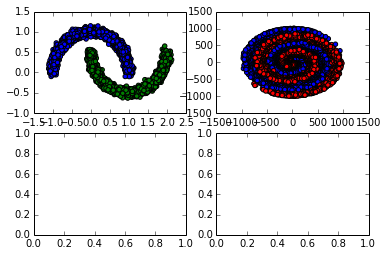

Model 1 accuracy: 0.98


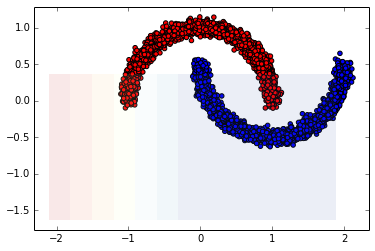

Model 1 accuracy: 0.87


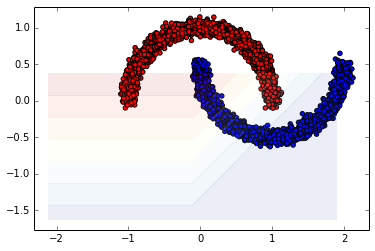

In [21]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import Perceptron
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings('ignore')

X,y = generate_dataset(nsamples=1000,type_is='moon',plot=True)
data_set = np.column_stack((X,y))
np.random.shuffle(data_set)

train_set = data_set[0:700]
test_set = data_set[700:1000]

models = [AdaBoostClassifier(base_estimator = DecisionTreeClassifier()),AdaBoostClassifier(base_estimator = Perceptron(),algorithm='SAMME')]
for model in models:
    model.fit(train_set[:,0:2],train_set[:,2:3])

for model in models:
    acc = 0.0
    for point in test_set:
        if model.predict(point[0:2])==point[2]:
            acc+=1
    acc/=len(test_set)
    print "Model 1 accuracy: "+str(acc)
    plot_decision_surfaces(X,y,model,alpha=.1,plot_step = 2)


### 4. Ensemble Learning

- Use the data provided to train **at least 4 types** of classifiers (from weeks 4-9). Bring them together with Ensemble learning and see how well the ensemble model is performing compared to the individual models.
 - You may use http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html#sklearn.ensemble.VotingClassifier
 - You may use your own implementations of algorithms from the previous weeks or use scikit-learn's respective methods.

(20000, 3)


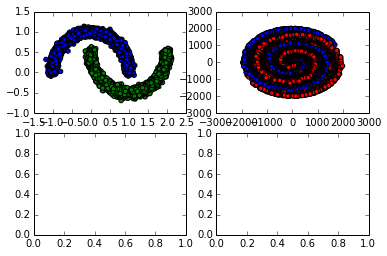

dec tree accuracy:
0.918


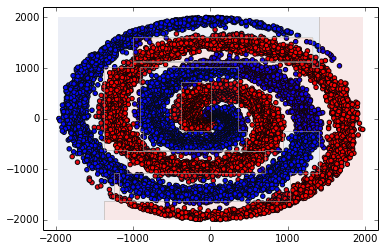

log reg accuracy:
0.566


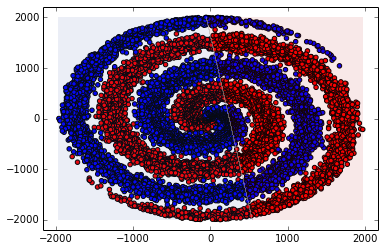

perceptron accuracy:
0.488


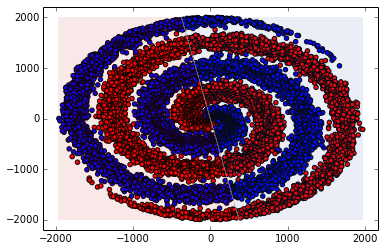

svm accuracy:
1.0


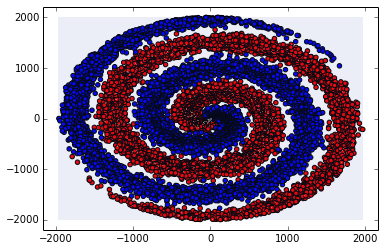

ensamble accuracy:
0.944


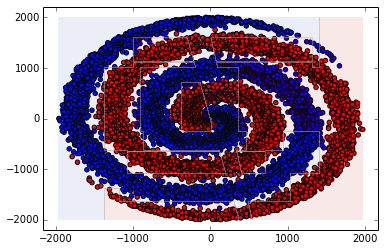

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn import svm
from sklearn.ensemble import VotingClassifier

X,y = generate_dataset(nsamples=2000,type_is='spiral',plot=True)
data_set = np.column_stack((X,y))
np.random.shuffle(data_set)

train_set = data_set[0:1500]
test_set = data_set[1500:2000]

classifiers = [tree.DecisionTreeClassifier(max_depth=12),LogisticRegression(),Perceptron(), svm.SVC() ]
classifiers = zip(['dec tree','log reg','perceptron','svm'],classifiers)
ensamble = VotingClassifier(estimators = classifiers)
for cls in classifiers:
    cls[1].fit(test_set[:,0:2],test_set[:,2:3])
ensamble.fit(test_set[:,0:2],test_set[:,2:3])

for cls in classifiers:
    print cls[0]+' accuracy:'
    acc = 0.0
    for point in test_set:
        if cls[1].predict(point[0:2])==point[2:3]:
            acc+=1
    acc/=len(test_set)
    print acc
    plot_decision_surfaces(X,y,cls[1],alpha=.1,plot_step = 2)
    
print 'ensamble accuracy:'
acc = 0.0
for point in test_set:
    if ensamble.predict(point[0:2])==point[2:3]:
        acc+=1
acc/=len(test_set)
print acc
plot_decision_surfaces(X,y,ensamble,alpha=.1,plot_step = 2)

### 5. AAAAAAAAND DONE!

In [ ]:
print "Done"

### Bonus/Tutorial 

- Implementation details using scikit-learn.
 - You may want to check http://scikit-learn.org/stable/modules/ensemble.html